# First try of 10 fold cross-validation with a simple neural network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
#extracting data from csv files into numpy arrays
from numpy import genfromtxt
files_data=np.array(['fold_data_1.csv','fold_data_2.csv','fold_data_3.csv','fold_data_4.csv','fold_data_5.csv',
                'fold_data_6.csv','fold_data_7.csv','fold_data_8.csv','fold_data_9.csv','fold_data_10.csv'])
X_folds= np.array([genfromtxt(file,delimiter=',') for file in files_data])

files_label=(['fold_labels_1.csv','fold_labels_2.csv','fold_labels_3.csv','fold_labels_4.csv','fold_labels_5.csv',
                'fold_labels_6.csv','fold_labels_7.csv','fold_labels_8.csv','fold_labels_9.csv','fold_labels_10.csv'])
Y_folds= np.array([genfromtxt(file,delimiter=',') for file in files_label])

In [3]:
# Reshaping Y_folds (Note: NOT for CNN)
for i in range(0, len(Y_folds)):
    Y_folds[i]=np.reshape(Y_folds[i],(Y_folds[i].shape[0], 1))

In [22]:
# Changing the labels into categorical (Note: ONLY for CNN)
from keras.utils.np_utils import to_categorical
Y_folds=([to_categorical(Y_folds, num_classes=10) for Y_folds in Y_folds])

In [4]:
# Reshaping folds
for i in range(0, len(X_folds)):
    X_folds[i]=np.reshape(X_folds[i],(X_folds[i].shape[0], 40, 6))

In [5]:
# 10 fold cross-validation
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
    
accuracy_scores = []

accuracy_history = []
loss_history = []
val_accuracy_history = []
val_loss_history = []

fold = 0
for i in range (0, len(Y_folds)) :
    fold+=1
    print(f"Fold #{fold}")
    
    x_train = np.vstack([X_folds[j] for j in range(0, len(Y_folds)) if i!=j])
    y_train = np.vstack([Y_folds[j] for j in range(0, len(Y_folds)) if i!=j])
    x_test = np.vstack([X_folds[j] for j in range(0, len(Y_folds)) if i==j])
    y_test = np.vstack([Y_folds[j] for j in range(0, len(Y_folds)) if i==j])
    print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
    
    model = Sequential()
    model.add(Flatten(input_shape=[40, 6]))
    model.add(Dense(300, activation="relu"))   
    model.add(Dense(100, activation="relu"))
    model.add(Dense(10, activation="softmax"))
    model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics = ["accuracy"])
#     Storing the history
    fitting_data = model.fit(x_train,y_train,batch_size=50,epochs=30,validation_data=(x_test,y_test), verbose=0)
    accuracy_history.append(fitting_data.history['acc'])
    loss_history.append(fitting_data.history['loss'])
    val_accuracy_history.append(fitting_data.history['val_acc'])
    val_loss_history.append(fitting_data.history['val_loss'])
    model_evaluation = model.evaluate(x_test, y_test, verbose = 0)
    score = model_evaluation[1]
    accuracy_scores.append(score)
    print("Fold score (Accuracy): {score}".format(score = score))

# Build the oos prediction list and calculate the error.
final_score = np.mean(accuracy_scores)
print(f"Final, out of sample score (Accuracy): {final_score}")  

Fold #1
(7859, 40, 6) (7859, 1) (873, 40, 6) (873, 1)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








Fold score (Accuracy): 0.14776632302405499
Fold #2
(7844, 40, 6) (7844, 1) (888, 40, 6) (888, 1)
Fold score (Accuracy): 0.11261261261261261
Fold #3
(7807, 40, 6) (7807, 1) (925, 40, 6) (925, 1)
Fold score (Accuracy): 0.10810810810810811
Fold #4
(7742, 40, 6) (7742, 1) (990, 40, 6) (990, 1)
Fold score (Accuracy): 0.10101010101010101
Fold #5
(7796, 40, 6) (7796, 1) (936, 40, 6) (936, 1)
Fold score (Accuracy): 0.10683760683760683
Fold #6
(7909, 40, 6) (7909, 1) (823, 40, 6) (823, 1)
Fold score (Accuracy): 0.13730255164034022
Fold #7
(7894, 40, 6) (7894, 1) (838, 40, 6) (838, 1)
Fold score (Accuracy): 0.11933174224343675
Fold #8
(7926, 40, 6) (7926, 1) (806, 40, 6) (806, 1)
Fold score (Accuracy): 0.0967741935483871
Fold #9
(7916, 40, 6) (7916, 1) (816, 40, 6) (816, 1)
Fold score (Accuracy): 0.12254901960784313
Fold #10
(7895, 40, 6

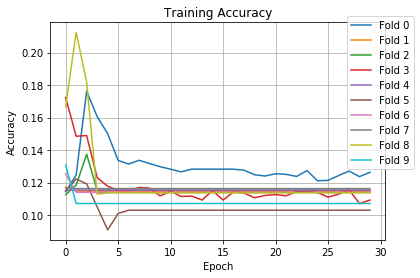

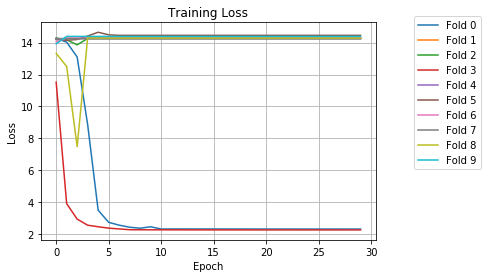

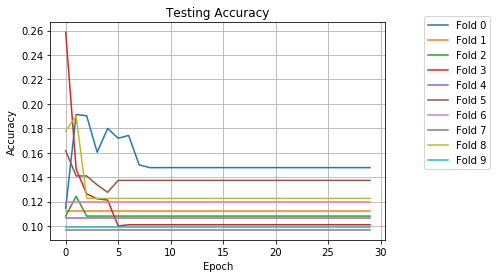

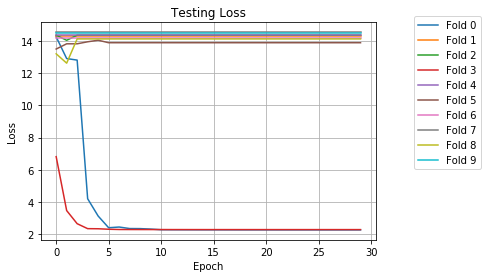

In [6]:
# Visualise loss/accuracy during training and testing separately
import matplotlib.pyplot as plt

for i in range(0,10):
    plt.plot(accuracy_history[i])
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Fold {}'.format(j) for j in range (0,10)], bbox_to_anchor=(1.1, 1.05))
plt.grid()
plt.show()

for i in range(0,10):
    plt.plot(loss_history[i])
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Fold {}'.format(j) for j in range (0,10)], bbox_to_anchor=(1.1, 1.05))
plt.grid()
plt.show()

for i in range(0,10):
    plt.plot(val_accuracy_history[i])
plt.title('Testing Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Fold {}'.format(j) for j in range (0,10)], bbox_to_anchor=(1.1, 1.05))
plt.grid()
plt.show()

for i in range(0,10):
    plt.plot(val_loss_history[i])
plt.title('Testing Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Fold {}'.format(j) for j in range (0,10)], bbox_to_anchor=(1.1, 1.05))
plt.grid()
plt.show()

# 10 fold cross-validation for a Convolutional Neural Network

In [23]:
# Reshaping folds for CNN
for i in range(0, len(X_folds)):
    X_folds[i]=np.reshape(X_folds[i],(X_folds[i].shape[0], 40, 6, 1))

In [24]:
# 10 fold cross-validation
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import KFold
    
accuracy_scores = []

accuracy_history = []
loss_history = []
val_accuracy_history = []
val_loss_history = []

fold = 0
for i in range (0, len(Y_folds)) :
    fold+=1
    print(f"Fold #{fold}")
    
    x_train = np.vstack([X_folds[j] for j in range(0, len(Y_folds)) if i!=j])
    y_train = np.vstack([Y_folds[j] for j in range(0, len(Y_folds)) if i!=j])
    x_test = np.vstack([X_folds[j] for j in range(0, len(Y_folds)) if i==j])
    y_test = np.vstack([Y_folds[j] for j in range(0, len(Y_folds)) if i==j])
    
    #forming model
    model=Sequential()

    model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(40,6,1)))
    model.add(MaxPooling2D(padding="same"))

    model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
    model.add(MaxPooling2D(padding="same"))
    model.add(Dropout(0.3))

    model.add(Flatten())

    model.add(Dense(256,activation="relu"))
    model.add(Dropout(0.3))

    model.add(Dense(512,activation="relu"))
    model.add(Dropout(0.3))

    model.add(Dense(10,activation="softmax"))

    #compiling
    model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

    #training the model
    #Storing the history
    fitting_data = model.fit(x_train,y_train,batch_size=50,epochs=30, verbose = 0,validation_data=(x_test,y_test))
    
    accuracy_history.append(fitting_data.history['acc'])
    loss_history.append(fitting_data.history['loss'])
    val_accuracy_history.append(fitting_data.history['val_acc'])
    val_loss_history.append(fitting_data.history['val_loss'])
    
    model_evaluation = model.evaluate(x_test, y_test, verbose = 0)
    score = model_evaluation[1]
    accuracy_scores.append(score)
    print("Fold score (Accuracy): {score}".format(score = score))

# Build the oos prediction list and calculate the error.
final_score = np.mean(accuracy_scores)
print(f"Final, out of sample score (Accuracy): {final_score}") 

Fold #1


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Fold score (Accuracy): 0.6231386025883214
Fold #2
Fold score (Accuracy): 0.11486486486486487
Fold #3
Fold score (Accuracy): 0.4583783785716907
Fold #4
Fold score (Accuracy): 0.3575757578165844
Fold #5
Fold score (Accuracy): 0.10683760683760683
Fold #6
Fold score (Accuracy): 0.4507897932937919
Fold #7
Fold score (Accuracy): 0.360381861575179
Fold #8
Fold score (Accuracy): 0.34863523573200994
Fold #9
Fold score (Accuracy): 0.6470588235294118
Fold #10
Fold score (Accuracy): 0.1111111111111111
Final, out of sample score (Accuracy): 0.3578772035920572


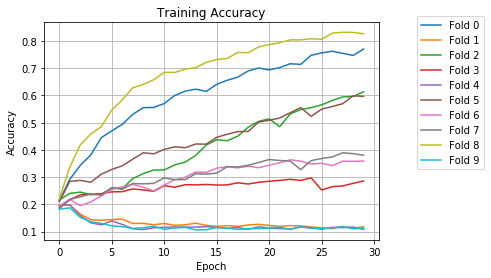

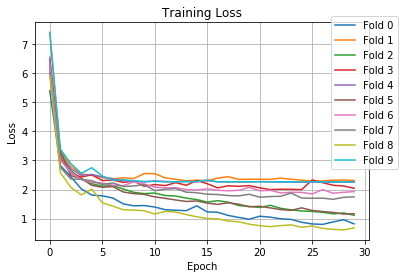

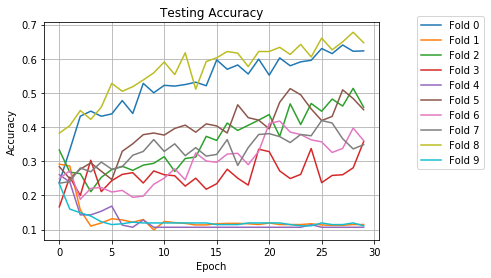

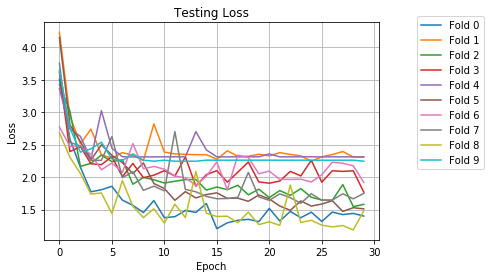

In [25]:
# Visualise loss/accuracy during training and testing separately
import matplotlib.pyplot as plt

for i in range(0,10):
    plt.plot(accuracy_history[i])
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Fold {}'.format(j) for j in range (0,10)], bbox_to_anchor=(1.1, 1.05))
plt.grid()
plt.show()

for i in range(0,10):
    plt.plot(loss_history[i])
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Fold {}'.format(j) for j in range (0,10)], bbox_to_anchor=(1.1, 1.05))
plt.grid()
plt.show()

for i in range(0,10):
    plt.plot(val_accuracy_history[i])
plt.title('Testing Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Fold {}'.format(j) for j in range (0,10)], bbox_to_anchor=(1.1, 1.05))
plt.grid()
plt.show()

for i in range(0,10):
    plt.plot(val_loss_history[i])
plt.title('Testing Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Fold {}'.format(j) for j in range (0,10)], bbox_to_anchor=(1.1, 1.05))
plt.grid()
plt.show()

# Creating a CNN from scratch (no cross-validation) 

In [15]:
Y_folds[0].shape, X_folds[0].shape 

((873, 10), (873, 40, 6, 1))

In [32]:
X_train = np.vstack([X_folds[j] for j in range(0, len(Y_folds)-1)])
y_train = np.vstack([Y_folds[j] for j in range(0, len(Y_folds)-1)])
X_test = X_folds[9]
y_test = Y_folds[9]


early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(40,6,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#train the model
cnn_model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, callbacks=[early_stopping_cb])
model.evaluate(X_test, y_test)

Train on 7895 samples, validate on 837 samples
Epoch 1/30
7895/7895 [==============================] - 5s 612us/step - loss: 4.4086 - acc: 0.4238 - val_loss: 3.0895 - val_acc: 0.4827
Epoch 2/30
7895/7895 [==============================] - 3s 367us/step - loss: 2.6515 - acc: 0.6279 - val_loss: 2.5758 - val_acc: 0.5842
Epoch 3/30
7895/7895 [==============================] - 3s 369us/step - loss: 2.3963 - acc: 0.6782 - val_loss: 1.8610 - val_acc: 0.6703
Epoch 4/30
7895/7895 [==============================] - 3s 382us/step - loss: 1.9234 - acc: 0.7272 - val_loss: 2.3063 - val_acc: 0.6356
Epoch 5/30
7895/7895 [==============================] - 3s 390us/step - loss: 1.8490 - acc: 0.7502 - val_loss: 1.9313 - val_acc: 0.6607
Epoch 6/30
7895/7895 [==============================] - 3s 396us/step - loss: 1.3631 - acc: 0.8009 - val_loss: 1.8851 - val_acc: 0.6655
Epoch 7/30
7895/7895 [==============================] - 3s 390us/step - loss: 0.9446 - acc: 0.8374 - val_loss: 1.7764 - val_acc: 0.6679
E

[1.748113632611619, 0.6487455197132617]